# Fraud Detection


### 1.1 Background: 
As part of Payments Canada's modernization plan, financial institutions are laying the foundation to support a new payments system known as the real-time rail (RTR). 

The RTR is designed to facilitate the instant and irrevocable exchange and clearing of payment items. The instant and irrevocable nature of the RTR places a large importance on the requirement for a robust system of detecting fraudulent transactions in real-time.

### 1.2 Mission: 
.... has been brought in by a large Canadian bank to ensure their internal fraud detection systems are capable of meeting the needs of the RTR when it goes live.


In particular, the ever-changing tactics of fraudsters necessitates the ability to quickly adapt to new attack vectors. While the banks can purchase off-the-shelf fraud solutions from third-party vendors, many of these products do not fully integrate with the wealth of information the bank has at their disposal across products and channels. 

You have been tasked with developing a  flexible fraud solution that can quickly learn to adapt to new attack vectors.


As part of this long-term initiative the bank has requested a proof-of-concept (PoC), and provided you with a sample dataset, sample.csv. 

Build a model that predicts whether a given transaction is fraudulent in either Python or R; comment your code liberally. The bank has specified that the model will be evaluated using the area under the ROC curve. Use your model to make a prediction for each row in test.csv by lling in a probability for whether the transaction is fraudulent in the y' column, saving it in the same format, and including it in your submission.


Formatting Notes: Files are in CSV format with headers. Columns x0'-x99' are features and y' is a label for whether the transaction was fraudulent with 0 corresponding to no and 1 corresponding to yes.



# 1.0 Data Load

In [ ]:
import pandas as pd
fdt =  pd.read_csv('sample.csv')
final_test = pd.read_csv('test.csv')
print('Fraud Data(fdt) Sucessfully Loaded')

Fraud Data(fdt) Sucessfully Loaded


In [ ]:
fdt[fdt.columns[0:20]].sample(2)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19
359,4.358590,-0.693756,7.255622,-7.159914,-0.877903,0.02%,Wednesday,6.201366,-3.199684,-1.156379,-8.889836,-4.815725,7.115407,-0.625488,0.895239,-0.407581,-1.392045,9.515863,-0.358498,16.637978
5195,-6.413035,-13.638074,-2.136518,0.946667,0.276646,-0.01%,Wednesday,3.227485,-1.038378,-1.227379,5.504210,8.627277,9.486431,-1.661060,9.462930,4.963309,1.829307,-7.664489,0.300010,13.797547


## 2.0 Exploratory Analysis

### Identify variable type

In [ ]:
fdt.describe( include= ['O'])

,x5,x6,x20,x27,x49,x57
count,7906,7909,7900,7920,7908,7915
unique,10,5,12,4,2,7826
top,0.01%,Wednesday,Jun,Evening,False,$-1235.44
freq,1929,4135,1912,3895,4330,3


In [ ]:
extra_cols = ['']
binary_features = ['x49']
categorical_features = list(['x6','x20','x27'])
target_col = list(['y'])
numerical_features = list( set(fdt.columns) - set(binary_features) \
     - set(categorical_features) -set(target_col) -set(extra_cols) )


### 2.1 Numerical Variables

In [ ]:
fdt[fdt.columns[0:20]].describe().round(4)

,x0,x1,x2,x3,x4,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19
count,7916.0000,7924.0000,7926.0000,7934.0000,7919.0000,7909.0000,7921.0000,7914.0000,7911.0000,7925.0000,7916.0000,7929.0000,7909.0000,7909.0000,7903.0000,7921.0000,7926.0000,7928.0000
mean,0.0602,0.4080,0.0543,-0.0233,-0.0045,0.0053,0.0065,0.0540,0.0822,-0.1625,5.3540,-0.0135,-0.0346,-0.0224,0.0002,0.0458,0.0010,0.0754
std,4.1144,14.0475,7.3357,8.7443,1.4958,7.8260,2.0607,4.8081,6.0910,9.6375,9.3417,1.4105,5.9559,5.4808,2.8271,8.0193,2.3910,8.4883
min,-18.2523,-42.4598,-27.9664,-31.4134,-5.1859,-30.0060,-9.7445,-17.1188,-23.4122,-36.4958,-44.3820,-5.0778,-23.6317,-19.5879,-11.3864,-27.1081,-9.0046,-30.4300
25%,-2.7084,-9.7469,-5.0184,-5.9047,-1.0019,-5.3320,-1.3884,-3.2062,-3.9793,-6.6733,-0.7868,-0.9577,-4.0818,-3.6090,-1.9243,-5.4135,-1.5572,-5.4946
50%,0.0427,-0.8318,0.0082,-0.0367,0.0087,-0.0122,-0.0002,0.1279,0.1563,-0.1135,5.1981,-0.0110,-0.0112,-0.0720,-0.0174,0.1272,-0.0212,-0.0234
75%,2.8704,9.4988,4.9119,5.8514,0.9878,5.2886,1.3372,3.3909,4.1800,6.3225,11.5451,0.9387,3.9926,3.6670,1.9151,5.5296,1.6158,5.7546
max,16.4643,58.0378,27.9642,29.5806,6.4042,25.6191,7.7978,16.5742,20.7084,34.3896,38.3911,4.7840,22.7731,20.0491,10.0937,28.6352,8.4174,34.5005


In [ ]:
fdt[fdt.columns[20:40]].describe().round(4)

,x21,x22,x23,x24,x25,x26,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39
count,7931.0000,7931.0000,7926.0000,7926.0000,7946.0000,7910.0000,7922.0000,7921.0000,7931.0000,7924.0000,7931.0000,7919.0000,7916.0000,7919.0000,7923.0000,7926.0000,7932.0000,7931.0000
mean,-0.0741,-0.0045,-0.0341,0.0008,-0.1819,0.1127,0.0044,-0.0511,0.0600,0.1322,-6.9158,-0.0101,0.0191,-1.4895,0.0226,0.0953,-0.0066,-0.0036
std,9.0289,9.9421,4.2767,0.1329,10.0335,8.2907,0.2731,8.7211,9.0917,4.6988,9.0515,3.4152,3.6437,2.0288,1.3644,4.9828,1.3249,8.4679
min,-35.0788,-36.1838,-14.7566,-0.5770,-40.8801,-31.7928,-1.0260,-29.6106,-31.0592,-17.7495,-38.9498,-13.2822,-13.1714,-9.7604,-5.4262,-17.7048,-4.9856,-31.8786
25%,-6.3268,-6.7180,-2.9148,-0.0872,-6.7387,-5.3768,-0.1796,-5.9808,-6.2162,-2.9467,-12.9456,-2.3008,-2.4535,-2.8468,-0.8927,-3.2406,-0.8985,-5.7891
50%,0.0024,0.0047,0.0164,0.0013,-0.3827,0.1774,0.0026,-0.0213,0.0761,0.1320,-6.9486,0.0069,0.0124,-1.4974,0.0140,0.0817,-0.0030,-0.0655
75%,6.1385,6.8258,2.8761,0.0882,6.6573,5.6717,0.1868,5.8608,6.2719,3.2626,-0.8793,2.3425,2.4769,-0.1613,0.9420,3.4043,0.8716,5.7390
max,34.8030,37.2726,18.0162,0.6172,36.8291,28.5790,0.9811,29.8770,34.9417,17.5151,26.8825,12.4757,15.4370,7.3566,4.4667,21.7015,5.0048,38.4787


### 2.2 Non-Numerical Variables

In [ ]:
fdt.describe(include=['O'])

,x5,x6,x20,x27,x49,x57
count,7906,7909,7900,7920,7908,7915
unique,10,5,12,4,2,7826
top,0.01%,Wednesday,Jun,Evening,False,$-1235.44
freq,1929,4135,1912,3895,4330,3


### 2.3 Exploring Categorical Features

In [ ]:
fdt.x6.dtypes

dtype('O')

In [ ]:
# Becuase exploratory plots fail with na
fdt_no_na =  fdt.dropna()
import seaborn as sns
import matplotlib.pyplot as plt
#sns.pairplot( fdt_no_na[ categorical_features +['y'] ],\
#                  vars  = categorical_features, hue = 'y', size = 3 )
#plt.show()

### 2.4 Exploring correlation

In [ ]:
corr = fdt.corr()

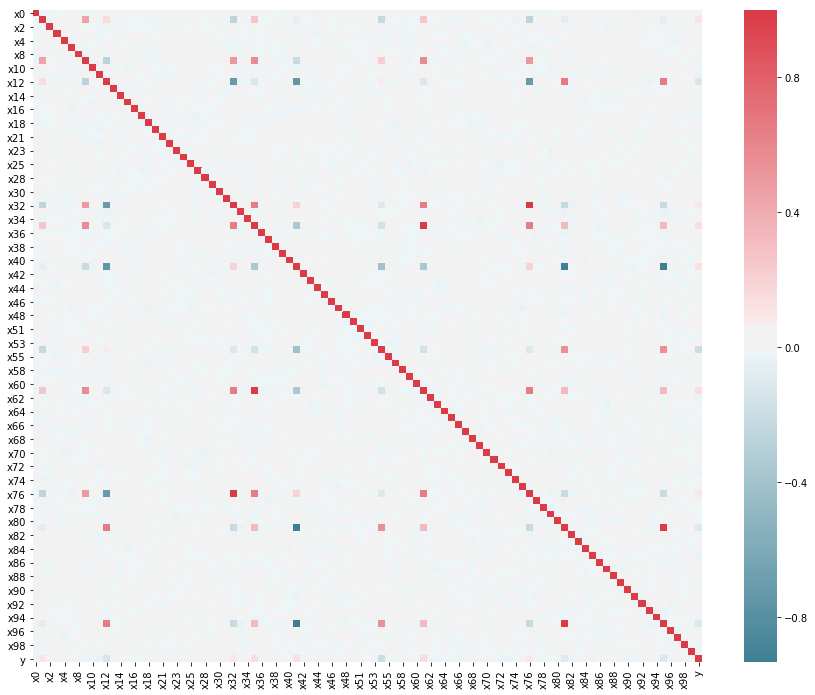

In [ ]:
# Diff vis style
f, ax = plt.subplots(figsize=(15, 12))
_ = sns.heatmap( corr, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            ax = ax          )
plt.show()

# Task 1 : Benchmark Model 

* Random Forest : Because it is robust to noise and hence acts as good benchmarking model to validate the data preprocessing and model build effort and process
* Some prior Basic Data PreProcessing is required
   * Fix Invalid Characters 
   * Fix Categorical Variables : because Sklearn Decision trees  can not handle categorical features.
   * Fix missing values : Because sklearn trees cannot handle missing values.


# 3.0 Data Pre-Processing


### 3.1 Cleanse Invalid Characters

1. x5  : Remove %
2. x57 : Remove $ 

In [ ]:
fdt.x5 = fdt.x5.apply(lambda x : str(x).replace('%','')).astype('float16')
fdt.x57 = fdt.x57.apply(lambda x : str(x).replace('$','')).astype('float16')
final_test.x5 = fdt.x5.apply(lambda x : str(x).replace('%','')).astype('float16')
final_test.x57 = fdt.x57.apply(lambda x : str(x).replace('$','')).astype('float16')

In [ ]:
fdt[['x5','x57']].describe()

,x5,x57
count,7906.000000,7915.000000
mean,0.000058,0.338867
std,0.010422,inf
min,-0.040009,-3688.000000
25%,-0.010002,-670.750000
50%,0.000000,2.269531
75%,0.010002,677.250000
max,0.040009,3708.000000


### 3.2 Numerical Missing values : Median  Replacement

In [ ]:
print('Missing values count pre fill = ' ,fdt.isnull().sum().sum())
fdt = fdt.fillna(fdt.median())
print('Missing values count post fill = ' ,fdt.isnull().sum().sum())
if fdt.isnull().sum().sum() > 0 :
    print('Columns with missing values :: ')
    print( fdt.isnull().sum().sort_values(ascending = False)[0:10] )
#fdt[fdt.y == 1].isnull().sum().sort_values(ascending = False)

Missing values count pre fill =  8000
Missing values count post fill =  450
Columns with missing values :: 
x20    100
x5      94
x6      91
x57     85
x27     80
x37      0
x28      0
x29      0
x30      0
x31      0
dtype: int64


In [ ]:
print('Missing values count pre fill = ' ,final_test.isnull().sum().sum())
final_test = final_test.fillna(fdt.median())
print('Missing values count post fill = ' ,final_test.isnull().sum().sum())
if final_test.isnull().sum().sum() > 0 :
    print('Columns with missing values :: ')
    print( final_test.isnull().sum().sort_values(ascending = False)[0:10] )
#fdt[fdt.y == 1].isnull().sum().sort_values(ascending = False)

Missing values count pre fill =  2001
Missing values count post fill =  106
Columns with missing values :: 
x27    25
x5     22
x6     22
x20    19
x57    18
x36     0
x28     0
x29     0
x30     0
x31     0
dtype: int64


### 3.2.1 Categorical Missing Values : Most Frequent Replacement

In [ ]:
import pandas as pd
import numpy as np
from sklearn.base import TransformerMixin

fdt = fdt.apply(lambda x : x.fillna(x.value_counts().index[0]))
print(fdt.isnull().sum().sort_values(ascending = False)[0:3])

final_test = final_test.apply(lambda x : x.fillna(x.value_counts().index[0]))
print(final_test.isnull().sum().sort_values(ascending = False)[0:3])


y      0
x36    0
x26    0
dtype: int64
x99    0
x36    0
x26    0
dtype: int64


## 3.3 Categorical to Dummy variables

1. Categorical to ordinal rejected because categorical rather than being ordinal are cyclic

In [ ]:
fdt.describe(include=['O'])

,x6,x20,x27,x49
count,8000,8000,8000,8000
unique,5,12,4,2
top,Wednesday,Jun,Evening,False
freq,4226,2012,3975,4422


In [ ]:
fdt = pd.get_dummies(fdt, columns = categorical_features )
fdt.sample()

final_test = pd.get_dummies(final_test, columns = categorical_features )
final_test.sample()

#fdt.fillna(fdt.mean(),inplace=True)
#fdt.apply(lambda col : col.fillna(col.mean()), axis =  )

,x0,x1,x2,x3,x4,x5,x7,x8,x9,x10,...,x20_Jun,x20_Mar,x20_May,x20_Nov,x20_Oct,x20_Sept,x27_Afternoon,x27_Evening,x27_Morning,x27_Night
1955,-1.750783,-16.189974,11.707941,18.736079,-0.91887,0.010002,2.744416,0.668697,-9.618377,3.248873,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
categorical_features
fdt.describe(include=['O'])

,x49
count,8000
unique,2
top,False
freq,4422


### 3.2 Binary Encoding : Not Needed

Already in binary form

In [ ]:
#import seaborn as sns
#sns.pairplot(fdt[['y','x49']], vars = ['x49'], hue  = 'y', size = 2.5 )
fdt.x49.sample(5)

2246    False
2763    False
7115    False
3995    False
5353     True
Name: x49, dtype: object

In [ ]:
fdt.describe(include=['O'])

,x49
count,8000
unique,2
top,False
freq,4422


## 3.4 Data Sampling :  Stratified

In [ ]:
# Create  Features and   target data
def create_X_y(df, target_col, verbose =  1):    
    feature_cols = list(set(df.columns) - set([target_col]))

    print("Feature column(s) are :\n", feature_cols)
    print("Target column is : ", target_col)

    X_all = df[feature_cols]
    y_all = df[target_col]
    return X_all, y_all
    
X_all, y_all = create_X_y(fdt,'y')

Feature column(s) are :
 ['x6_Wednesday', 'x20_Sept', 'x83', 'x22', 'x6_Monday', 'x6_Tuesday', 'x76', 'x2', 'x36', 'x16', 'x27_Evening', 'x27_Morning', 'x88', 'x20_Mar', 'x90', 'x9', 'x27_Night', 'x37', 'x49', 'x92', 'x94', 'x85', 'x99', 'x80', 'x59', 'x93', 'x87', 'x27_Afternoon', 'x98', 'x69', 'x28', 'x0', 'x41', 'x45', 'x91', 'x61', 'x82', 'x11', 'x21', 'x56', 'x63', 'x20_Oct', 'x40', 'x25', 'x17', 'x4', 'x54', 'x84', 'x13', 'x5', 'x97', 'x15', 'x33', 'x66', 'x14', 'x55', 'x46', 'x50', 'x79', 'x26', 'x53', 'x20_Jun', 'x7', 'x64', 'x75', 'x74', 'x67', 'x72', 'x6_Friday', 'x20_Dec', 'x57', 'x20_Nov', 'x47', 'x12', 'x20_Aug', 'x68', 'x39', 'x20_Jan', 'x20_Feb', 'x20_May', 'x65', 'x48', 'x60', 'x31', 'x10', 'x24', 'x52', 'x89', 'x32', 'x29', 'x19', 'x35', 'x58', 'x77', 'x44', 'x30', 'x1', 'x62', 'x18', 'x42', 'x8', 'x34', 'x6_Thurday', 'x51', 'x86', 'x73', 'x78', 'x38', 'x23', 'x96', 'x81', 'x95', 'x43', 'x3', 'x71', 'x20_Apr', 'x20_Jul', 'x70']
Target column is :  y


In [ ]:
def get_stratified_data(X_df, y_series, test_size = 0.3):
    from sklearn.model_selection import StratifiedShuffleSplit
    
    feature_cols = list(X_df.columns)
    #target_col = y_df.columns
    
    X = np.array(X_df)
    y = np.array(y_series)

    sss = StratifiedShuffleSplit(n_splits=2, test_size=test_size, random_state=4)
    sss.get_n_splits(X, y)

    for train_index, test_index in sss.split(X, y):
        print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
    
    X_train =  pd.DataFrame(X_train, columns= feature_cols)
    X_test =  pd.DataFrame(X_test, columns= feature_cols)

    y_train =  pd.DataFrame(y_train)
    y_test =  pd.DataFrame(y_test)
    
    return X_train, y_train, X_test,  y_test

# X_trainR = X_Train Raw i.e  not preprocessed data
X_trainR, y_trainR, X_testR,  y_testR  = get_stratified_data(X_all, y_all)

TRAIN: [5085 1220 4876 ... 3901 1540 3393] TEST: [4828 5978 4207 ... 1605  981 7602]
TRAIN: [6913 5692 2693 ... 2374 4038 4347] TEST: [3216 6744 3563 ... 2420  864 6250]


## 3.5 Evaluation Metrics

Bank's Eval Metric Choice : Area under the ROC curve.

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Defining the confusion matrix function
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):   
    import itertools
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
                
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

def area_under_roc(y, pred):
    from sklearn import metrics
    #fpr,tpr, thresholds = metrics.roc_curve(y, pred, pos_label=2 )
    auc = metrics.roc_auc_score(y, pred)
    #print('fpr,tpr, AUC (higher is better)', fpr, tpr, auc)
    print('AUC (higher is better)', auc)
    return(auc)
    
def eval_classification(y_test, ypred_test,\
        class_labels = ['Retained', 'Churn - Lost' ], metrics = ['auc']   ):
    if 'auc' in metrics:
        auc = area_under_roc(y_test, ypred_test)
    if 'confusion_matrix' in metrics:
        print('Confusion report is')
        #print(classification_report(y_test, ypred_test) )    
        conf_matrix = confusion_matrix(y_test, ypred_test)
        plot_confusion_matrix(conf_matrix, classes = class_labels, title = 'Confusion Matrix')
        #return(conf_matrix)
    return auc
class_labels = ['Genuine', 'Fraud']    
#_y = np.array([0, 0, 1, 1])
#_pred = np.array([0.1, 0.4, 0.35, 0.8])
#eval_classification(_y, _pred)

## Task 2 contd 

### 4.1 Benchmark Model: Decision tree

In [ ]:
def simple_tree(X_trainR, y_trainR, X_testR, y_testR, \
            max_depth = None, class_weight = None,\
                class_labels = None):
    from sklearn import tree
    clf = tree.DecisionTreeClassifier( max_depth =   max_depth, \
                        class_weight = class_weight )
    clf.fit(X_trainR, y_trainR)
    ypred_testR = clf.predict(X_testR)

    auc_score = eval_classification(y_testR, ypred_testR, class_labels=class_labels )
    return ypred_testR,clf,auc_score
   

ypred_testR, clf, auc_score = simple_tree(X_trainR, y_trainR, X_testR, y_testR \
                   , max_depth = 10, class_labels =class_labels )

models = {}
models[0] = { 'desc ' : 'Benchmark Decision Tree ' , 'auc' : auc_score }


AUC (higher is better) 0.7521043771043772


In [ ]:
models

{0: {'auc': 0.7521043771043772, 'desc ': 'Benchmark Decision Tree '}}

### 4.2 Benchmarking Boosted Trees

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators = 100, learning_rate = 1.5, random_state= 40)
clf.fit(X_trainR, y_trainR)
ypred_testR = clf.predict(X_testR)
auc_score = eval_classification(y_testR, ypred_testR, class_labels=class_labels )


/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AUC (higher is better) 0.6832611832611831


In [ ]:
models[1] = {'desc' : 'Benchmark Boosted Trees', 'auc': auc_score}
models

{0: {'auc': 0.7521043771043772, 'desc ': 'Benchmark Decision Tree '},
 1: {'auc': 0.6832611832611831, 'desc': 'Benchmark Boosted Trees'}}

# 3. Resuming PreProcessing 

## 3.8 Outlier Analysis : Preserved

Preserving outlier because the fraud itself is an outlier phenomenon and hence the outliers can in fact be signal rather than noise itself.

In [ ]:
def get_outlier_count(df, find_outliers_in_subset_df = None):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1    
    if find_outliers_in_subset_df is not None:
        df = find_outliers_in_subset_df
    print('Total Rows :',df.shape[0] )
    return ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum().sort_values(ascending = False)

get_outlier_count(fdt[numerical_features])[0:20]

Total Rows : 8000


x54    121
x24     88
x61     85
x76     85
x32     85
x35     82
x53     81
x95     81
x81     81
x89     80
x8      79
x84     79
x78     79
x38     77
x79     76
x98     75
x66     73
x55     72
x11     72
x71     72
dtype: int64

In [ ]:
# evaluating Outliers for Fraud only case vs above  numbers representing all
fdt_fraud_only = fdt[fdt.y == 1]
get_outlier_count(fdt[numerical_features],\
                  fdt_fraud_only[numerical_features])[0:10]

Total Rows : 439


x54    49
x95    32
x81    32
x61    14
x35    13
x38     9
x42     8
x41     7
x36     7
x91     7
dtype: int64

## 3.9 Feature Scaling

Proper scaling should be choosen becuase we have preserved the outliers in our data and some scaling are  sensnitive or highly affected with outliers presence.

1. StandardScaler : Very Outlier sensitive because mean and sd are sensitive to outliers.
2. MinMaxscaler : Very Outlier sensitive
3. MaxAbsScaler : Outlier sensitive
4. RobustScaler : Centering and scaling based on percentiles,hence less outliers ensitive + Outliers  in transformed data are preserved.
5. QuantileTransformer : Outlier sensitive but outliers are clipped.

In [ ]:
_fdt = fdt

In [ ]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler

scaler = RobustScaler()
#scaler = MinMaxScaler()
scaler.fit(fdt[numerical_features])
fdt[numerical_features] = scaler.transform(fdt[numerical_features])
fdt.describe()

,x0,x1,x2,x3,x4,x5,x7,x8,x9,x10,...,x20_Jun,x20_Mar,x20_May,x20_Nov,x20_Oct,x20_Sept,x27_Afternoon,x27_Evening,x27_Morning,x27_Night
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,...,8000.000000,8000.000000,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000
mean,0.003155,0.064474,0.004674,0.001145,-0.006675,0.002876,0.001643,0.002452,-0.011215,-0.009071,...,0.251500,0.026250,0.161125,0.00325,0.020625,0.068125,0.444125,0.496875,0.025000,0.03400
std,0.743692,0.734039,0.746246,0.748000,0.758257,0.517757,0.740455,0.762132,0.733819,0.750100,...,0.433902,0.159888,0.367669,0.05692,0.142134,0.251976,0.496899,0.500021,0.156135,0.18124
min,-3.324376,-2.185563,-2.859050,-2.695136,-2.646752,-2.000000,-2.854148,-3.621742,-2.646465,-2.918724,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,-0.495065,-0.463186,-0.503049,-0.500028,-0.510487,-0.500000,-0.500246,-0.508640,-0.505475,-0.506936,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,0.504935,0.536814,0.496951,0.499972,0.489513,0.500000,0.499754,0.491360,0.494525,0.493064,...,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,0.000000,0.00000
max,2.983981,3.090790,2.857160,2.544014,3.258618,2.000000,2.439010,2.898336,2.523639,2.545182,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [ ]:
scaler.fit(final_test[numerical_features])
final_test[numerical_features] = scaler.transform(final_test[numerical_features])

## 3.11 Feature Selection : Variance Threshold

Variance must be considered after scaling, as it is scale sensitive.

Dummy features have low threshold, which seems reasonable considering 1 variable is exploded into  many variables i.e 1 month into 11 dummy variables. And hence 1 will contain approximately 1/12th information, while it will be 0 for almost 11/12 cases.

Hence no variance threshold action taken.

It is often better idead to  only consider numeric non- dummy features. As dummy variables created are likely to have low variance.

In [ ]:
fdt.var().sort_values()[0:30]

x20_Jan          0.001124
x20_Dec          0.001249
x20_Nov          0.003240
x20_Feb          0.005841
x6_Friday        0.006088
x20_Oct          0.020202
x6_Monday        0.024259
x27_Morning      0.024378
x20_Mar          0.025564
x27_Night        0.032848
y                0.051870
x20_Sept         0.063492
x20_Apr          0.073084
x6_Thurday       0.125671
x20_Aug          0.130041
x20_May          0.135181
x20_Jul          0.175970
x20_Jun          0.188271
x6_Tuesday       0.207332
x27_Afternoon    0.246909
x49              0.247248
x6_Wednesday     0.249233
x27_Evening      0.250021
x5               0.268072
x90              0.465708
x59              0.530817
x96              0.530926
x21              0.533419
x30              0.533846
x64              0.534347
dtype: float64

## 3.10 Data Skewness


In [ ]:
from scipy.stats import skew
skew_feat_scores =fdt[numerical_features].apply(lambda x: skew(x.dropna())).sort_values( ascending = False)
skewed_feats = skew_feat_scores[skew_feat_scores > 0.75]
skewed_feats

Series([], dtype: float64)

In [ ]:
fdt[skewed_feats.index] = fdt[skewed_feats.index].apply(lambda x : np.log1p(x) )

## 3.12 Data Reduction : Correlation Threshold

High correlated features removed i.e > 0.95 or < -0.95

In [ ]:
corr_matrix = fdt.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
high_cor_cols = [column for column in upper.columns if any(upper[column] > 0.95)]
print('Highly correlated features are :',high_cor_cols)
fdt.drop(high_cor_cols, axis = 1,inplace=True)
print('Removed Highly correlated columns')

Highly correlated features are : ['x61', 'x76', 'x95']
Removed Highly correlated columns


In [ ]:
#final_test.drop(high_cor_cols, axis = 1,inplace=True)

## 3.13 Creating Balanced Dataset :  SMOTE

1. Undersampling
2. Oversampling
3. SMOTE - Synthetic Minority Oversampling
4. F-Race : Sample data + test all three balancing strategy and select the most optimal. TO DO IN LATER VERSIONS

**Why SMOTE? **

Literature study recommends using either SMOTE or undersampling. Since we already are deling with very small dataset, undersampling will yield very few data and that is highly likely to limit the learning process. Hence we will use SMOTE instead for this case



In [ ]:
X, y  = create_X_y(fdt,'y')
X_train, y_train, X_valid,  y_valid  = get_stratified_data(X_all, y_all)
X_valid, y_valid, X_test,  y_test  = get_stratified_data(X_valid, y_valid, 0.5)
print('[0class 1class] =  ',np.bincount(y_train[0]))

Feature column(s) are :
 ['x6_Wednesday', 'x20_Sept', 'x83', 'x22', 'x6_Monday', 'x6_Tuesday', 'x76', 'x2', 'x36', 'x16', 'x27_Evening', 'x27_Morning', 'x88', 'x20_Mar', 'x90', 'x9', 'x27_Night', 'x37', 'x49', 'x92', 'x94', 'x85', 'x99', 'x80', 'x59', 'x93', 'x87', 'x27_Afternoon', 'x98', 'x69', 'x28', 'x0', 'x41', 'x45', 'x91', 'x61', 'x82', 'x11', 'x21', 'x56', 'x63', 'x20_Oct', 'x40', 'x25', 'x17', 'x4', 'x54', 'x84', 'x13', 'x5', 'x97', 'x15', 'x33', 'x66', 'x14', 'x55', 'x46', 'x50', 'x79', 'x26', 'x53', 'x20_Jun', 'x7', 'x64', 'x75', 'x74', 'x67', 'x72', 'x6_Friday', 'x20_Dec', 'x57', 'x20_Nov', 'x47', 'x12', 'x20_Aug', 'x68', 'x39', 'x20_Jan', 'x20_Feb', 'x20_May', 'x65', 'x48', 'x60', 'x31', 'x10', 'x24', 'x52', 'x89', 'x32', 'x29', 'x19', 'x35', 'x58', 'x77', 'x44', 'x30', 'x1', 'x62', 'x18', 'x42', 'x8', 'x34', 'x6_Thurday', 'x51', 'x86', 'x73', 'x78', 'x38', 'x23', 'x96', 'x81', 'x95', 'x43', 'x3', 'x71', 'x20_Apr', 'x20_Jul', 'x70']
Target column is :  y
TRAIN: [5085 1220 4

In [ ]:
import imblearn
from imblearn.over_sampling import SMOTE

sm = SMOTE (random_state = 4, ratio = 1)
X_train, y_train = sm.fit_sample(X_train, y_train)

print('[0class 1class] after SMOTE over sampling =  ',np.bincount(y_train))

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


[0class 1class] after SMOTE over sampling =   [5293 5293]


## 3.13 Data Reduction : L1 based

Hypothetical testing

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X_train, y_train)
model = SelectFromModel(lsvc, prefit=True)
X_l1 = model.transform(X_train)
print(X_train.shape,' => ', X_l1.shape )

(10586, 118)  =>  (10586, 96)


## 3.14 Data Reduction 

1. PCA / LDA / AutoEncoders
2. Model Based


# 4.0 Resume Modeling

## 4.3  Decision tree :  Post Data Balance

After Data PreProcessing

In [ ]:
X_test.shape

(1200, 118)

In [ ]:
ypred_test, clf, auc_score = simple_tree(X_train, y_train, X_test, y_test \
                   , max_depth = 5, class_labels =class_labels )


AUC (higher is better) 0.7969175885842552


In [ ]:
models[2] = {'auc': auc_score, 'desc': 'Benchmark PostProcessing Tree - depth 5'}
models

{0: {'auc': 0.7507816257816258, 'desc ': 'Benchmark Decision Tree '},
 1: {'auc': 0.6832611832611831, 'desc': 'Benchmark Boosted Trees'},
 2: {'auc': 0.7935706269039602,
  'desc': 'Benchmark PostProcessing Tree - depth 5'}}

## 4.4 Boosted Trees : AdaBoost + Gradient Boost

In [ ]:
# Boosted Trees
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators = 25, learning_rate = 0.1, random_state= 40)
%timeit -r 2 clf.fit(X_train, y_train)
ypred_test = clf.predict(X_test)
auc_score = eval_classification(y_test, ypred_test, class_labels=class_labels )

3.32 s ± 65.5 ms per loop (mean ± std. dev. of 2 runs, 1 loop each)
AUC (higher is better) 0.7251082251082251


In [ ]:
# Boosted Trees
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators = 25, max_depth = 5,\
                                 learning_rate = 0.01, random_state= 40)
clf.fit(X_train, y_train)
ypred_test = clf.predict(X_test)
auc_score = eval_classification(y_test, ypred_test, class_labels=class_labels )

AUC (higher is better) 0.8197851531184864


### 4.4.1 HyperParameter Serach over Gradient Boosted trees

In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from skopt.utils import use_named_args


space  = [Integer(10, 50, name='n_estimators'),
          Integer(5, 15, name='max_depth'),
          Real(10**-6, 10**-2, "log-uniform", name='learning_rate'),
          Integer(30, 70, name='max_features'),
          #Integer(2, 100, name='min_samples_split'),
          #Integer(50, 100, name='min_samples_leaf')
         ]

clf = GradientBoostingClassifier(n_estimators = 50, max_depth = 5,\
                                 learning_rate = 0.0001, random_state= 40)
default_parameters = [50,8,0.00001,50] #,20,20]
@use_named_args(space)
def fitness(**params):    
    clf.set_params(**params)
    clf.fit(X_train,  y_train )    
    auc_score = eval_classification(y_valid, clf.predict(X_valid), class_labels=class_labels )    
    return -auc_score # scikit opt does minimisation instead of maximisation, hence  we negate it


fitness(default_parameters)

AUC (higher is better) 0.8482844316177649


-0.8482844316177649

In [ ]:
from skopt import gp_minimize
res_gp = gp_minimize(fitness, space, n_calls=50, random_state=0)

AUC (higher is better) 0.8276815776815776
AUC (higher is better) 0.8179012345679012
AUC (higher is better) 0.8201859868526534
AUC (higher is better) 0.8388648388648389
AUC (higher is better) 0.8321709155042489
AUC (higher is better) 0.8304072470739138
AUC (higher is better) 0.8473224306557641
AUC (higher is better) 0.8104056437389769
AUC (higher is better) 0.8354176687510021
AUC (higher is better) 0.8174603174603174
AUC (higher is better) 0.857423440756774
AUC (higher is better) 0.8223905723905723
AUC (higher is better) 0.8426326759660093
AUC (higher is better) 0.8519721019721019
AUC (higher is better) 0.8658810325476993
AUC (higher is better) 0.8689674523007858
AUC (higher is better) 0.8721340388007056


/usr/local/lib/python3.5/dist-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


AUC (higher is better) 0.8721340388007056
AUC (higher is better) 0.7282347282347282
AUC (higher is better) 0.8394660894660895
AUC (higher is better) 0.805475388808722
AUC (higher is better) 0.822711239377906
AUC (higher is better) 0.8331329164662498
AUC (higher is better) 0.8205066538399872
AUC (higher is better) 0.7585377585377585
AUC (higher is better) 0.848003848003848
AUC (higher is better) 0.8391855058521726
AUC (higher is better) 0.8578643578643578
AUC (higher is better) 0.785393618726952
AUC (higher is better) 0.8654401154401155
AUC (higher is better) 0.8555796055796056
AUC (higher is better) 0.8600689434022766
AUC (higher is better) 0.8399871733205067


/usr/local/lib/python3.5/dist-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


AUC (higher is better) 0.8689674523007858
AUC (higher is better) 0.8694885361552029
AUC (higher is better) 0.8009860509860509


/usr/local/lib/python3.5/dist-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


AUC (higher is better) 0.8689674523007858
AUC (higher is better) 0.8494067660734328
AUC (higher is better) 0.8631553631553631
AUC (higher is better) 0.8430735930735931
AUC (higher is better) 0.8689674523007858
AUC (higher is better) 0.8371011704345038
AUC (higher is better) 0.8318903318903319
AUC (higher is better) 0.7692801026134359
AUC (higher is better) 0.8448372615039281
AUC (higher is better) 0.8632355299021967
AUC (higher is better) 0.8761022927689596
AUC (higher is better) 0.6890331890331891
AUC (higher is better) 0.8117283950617283
AUC (higher is better) 0.8295254128587461


In [ ]:
# Best HyperParameters
print('Best hyperparameter is :', res_gp.x )
print('Best auc score is is : ', res_gp.fun )
#print(' ')
#print('All hyper params and their respective accuracy is')
#sorted(zip((res_gp.func_vals*-100).astype(np.float16), res_gp.x_iters), reverse=True)

Best hyperparameter is : [23, 5, 0.01, 70]
Best auc score is is :  -0.8761022927689596


## 4.5 Static best optimal model

1. HyperParam search over SVM

In [ ]:
from sklearn import svm
clf = svm.SVC()
%timeit -r 1 clf.fit(X_train, y_train)
y_pred_test = clf.predict(X_test)
#nn_model.predict_proba(X_test)
eval_classification( y_test,  y_pred_test, class_labels=class_labels )
print('Completed')

1min 7s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
AUC (higher is better) 0.5
Completed


In [ ]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(hidden_layer_sizes=(200, ), activation = 'relu',\
                  solver = 'adam', max_iter = 100000, tol = 0.001,\
                  shuffle = True )
#nn_model = nn.fit(X_train, y_train)
#y_test = nn_model.predict(X_test)
#nn_model.predict_proba(X_test)
#eval_classification( y_test,  y_pred_test, class_labels=class_labels )


## 4.5.1 Static Keras Classifier + Hyperparameter tuning

In [ ]:
import tensorflow as tf
import numpy as np
import math

# Keras Imports
from tensorflow.python.keras import backend as K
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import InputLayer, Input, Reshape, Dense, Flatten,Dropout 
from tensorflow.python.keras.callbacks import TensorBoard
from tensorflow.python.keras.optimizers import Adam, SGD
from tensorflow.python.keras.models import load_model

from keras.models  import model_from_json
# SkOpt Bayesian Hyperparameter optimisation imports
import skopt
from skopt import gp_minimize, forest_minimize
from skopt.space import Real, Categorical, Integer
from skopt.utils import use_named_args

## Configs
validation_data = (X_valid,y_valid )
dropout_values = 0.2
activation = 'relu'
batch_sizes = 20
input_feat_len = X_train.shape[1]
num_classes = 1

### 4.5.1.1 HyperParameter Search Boundary Defination

In [ ]:
# we will search over k only for 1e-k i.e 0.01, 0.001, 0.0001, 0.00001 , because we specified log-uniform
dim_learning_rate = Real(low=1e-5, high=1e-1, prior='log-uniform',  name='learning_rate') 
dim_dropout_values = Real(low=0.1, high=0.4 , prior='uniform', name='dropout_values') 
dim_num_dense_layers = Integer(low=1, high=15, name='num_dense_layers')
dim_num_hidden_nodes = Integer(low=30, high=256, name='num_hidden_nodes')
dim_batch_sizes = Integer(low=10, high=100, name='batch_sizes')
dim_optimisers = Categorical(categories=['Adam'],    name='optimisers')
#dim_activation = Categorical(categories=['relu', 'sigmoid'],    name='activation')
# Combine boundaries, to be fed as single boundary list
dimensions = [dim_learning_rate,dim_num_dense_layers, dim_num_hidden_nodes,\
              dim_batch_sizes, dim_optimisers, dim_dropout_values ]

## 2.0 Decent Default parameters 
# Start search from a decent choice, so that the search narrows faster
default_parameters = [0.001, 5, 64, 40,'Adam',0.4]



### 4.5.1.2 Create Keras Model

In [ ]:
# define roc_callback, inspired by https://github.com/keras-team/keras/issues/6050#issuecomment-329996505
def auc_roc(y_true, y_pred):
    # any tensorflow metric
    value, update_op = tf.contrib.metrics.streaming_auc(y_pred, y_true)

    # find all variables created for this metric
    metric_vars = [i for i in tf.local_variables() if 'auc_roc' in i.name.split('/')[1]]

    # Add metric variables to GLOBAL_VARIABLES collection.
    # They will be initialized for new session.
    for v in metric_vars:
        tf.add_to_collection(tf.GraphKeys.GLOBAL_VARIABLES, v)

    # force to update metric values
    with tf.control_dependencies([update_op]):
        value = tf.identity(value)
        return value

## 3.0 Create a keras model
def create_model(learning_rate, num_dense_layers,  num_hidden_nodes,  optimisers, dropout_values  ):
    activation = 'relu'
    model = Sequential()
    model.add(Dense(64, input_dim = 118, activation=activation, name='input' ))     
    for i in range(num_dense_layers):        
        model.add(Dense(num_hidden_nodes,activation=activation,name='fc_layer_{0}'.format(i+1)))
        model.add(Dropout(dropout_values))

    model.add(Dense(num_classes, activation='sigmoid', name='output_layer'))
    optimizer = eval(optimisers)(lr=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', \
                  metrics=['accuracy',auc_roc])    
    return model



### 4.5.1.3 Define Fitness Function

In [ ]:
#from tflearn.objectives import roc_auc_score
from sklearn.metrics import roc_auc_score
from keras.callbacks import Callback, EarlyStopping
#import tflearn.objectivess.roc_auc_score


save_best_model_path = 'best_conv_model'
best_auc = 0.0

# optimiser function. skopt performs minimisation instead of maximisation, hence we negate the accuracy
# @use_named_args  used so that the function can be called as a single list as required by skopt i.e fitness(x=[1e-4, 3, 256, 'relu'])
@use_named_args(dimensions=dimensions)
def fitness(learning_rate, num_dense_layers,  num_hidden_nodes, batch_sizes,\
            optimisers, dropout_values ):
    # Print the hyper-parameters.
    print('learning rate : ', learning_rate,'. Num_dense_layers:', num_dense_layers,'. num_hidden_nodes:', num_hidden_nodes)
    print('optimisers: ', optimisers,'.  batch_sizes: ',batch_sizes,'. dropout_values : ',dropout_values)    
    
    my_callbacks = [EarlyStopping(monitor='auc_roc', patience=300, verbose=1, mode='max')]

    # Create the neural network with the new hyper-parameters.
    model = create_model(learning_rate=learning_rate, num_dense_layers=num_dense_layers,\
                    num_hidden_nodes=num_hidden_nodes,  optimisers=optimisers,\
                    dropout_values = dropout_values
                        )   
    history = model.fit(x=X_train,  y=y_train,  epochs=1,
                        batch_size=batch_sizes , validation_data=validation_data\
                        ,callbacks=my_callbacks)
    # Get the classification accuracy on the validation-set after the last training-epoch.
    accuracy = history.history['val_acc'][-1]
    validation_auc = history.history['val_auc_roc'][-1]
    #print('Val auc roc:',validation_auc  )
    global best_auc # global to preserve  the accuracy beyond this function scope

    if validation_auc > best_auc:
        from keras.models import model_from_yaml
        model_json = model.to_yaml()
        with open("model.yaml", "w") as json_file:
            json_file.write(model_json)
        model.save_weights("model.h5")
        #print("Saved model to disk")                
        best_auc = validation_auc    
    del model # free memory for next model, once performance evaluation with current hyper parameter is done.
    
    K.clear_session() # resetting graph, other wise model will be added to same tensorflow graph everytime with new hyperparams
    return -validation_auc # scikit opt does minimisation instead of maximisation, hence  we negate it

In [ ]:
## 5.0 Test Fitness function
fitness(x=default_parameters)

learning rate :  0.001 . Num_dense_layers: 5 . num_hidden_nodes: 64
optimisers:  Adam .  batch_sizes:  40 . dropout_values :  0.4
Train on 10586 samples, validate on 2400 samples
Epoch 1/1
10586/10586 [==============================] - 3s 263us/step - loss: 2.3405 - acc: 0.5043 - auc_roc: 0.5059 - val_loss: 0.7026 - val_acc: 0.1688 - val_auc_roc: 0.5084
Val auc roc: 0.5083592981100082
Saved model to disk


-0.5083592981100082

### 4.5.1.4 Run HyperParam Optimisation :: Bayesian Optimisation

In [ ]:
hp_search_result = gp_minimize(func=fitness,    # function to minimise
                            dimensions=dimensions, # hyperparamter search boundary to search through
                            acq_func='EI', # Expected Improvement.
                            n_calls=320,   #40 no of calls to func to find minimum
                            x0=default_parameters
                           ,n_jobs = 4 # number of cores to run in parallel
                           )

learning rate :  0.001 . Num_dense_layers: 5 . num_hidden_nodes: 64
optimisers:  Adam .  batch_sizes:  40 . dropout_values :  0.4
Train on 10586 samples, validate on 2400 samples
Epoch 1/1
10586/10586 [==============================] - 3s 240us/step - loss: 2.4762 - acc: 0.5048 - auc_roc: 0.4997 - val_loss: 0.7047 - val_acc: 0.2242 - val_auc_roc: 0.5037
Val auc roc: 0.5036625663439432
learning rate :  0.00027450371388937724 . Num_dense_layers: 12 . num_hidden_nodes: 252
optimisers:  Adam .  batch_sizes:  21 . dropout_values :  0.29185665013056405
Train on 10586 samples, validate on 2400 samples
Epoch 1/1
10586/10586 [==============================] - 18s 2ms/step - loss: 0.8399 - acc: 0.4958 - auc_roc: 0.4960 - val_loss: 0.6837 - val_acc: 0.9413 - val_auc_roc: 0.5084
Val auc roc: 0.5084122348576784
Saved model to disk
learning rate :  0.006637469544068262 . Num_dense_layers: 10 . num_hidden_nodes: 120
optimisers:  Adam .  batch_sizes:  57 . dropout_values :  0.22097168970532405
Train o

10586/10586 [==============================] - 3s 328us/step - loss: 8.0603 - acc: 0.4998 - auc_roc: 0.4990 - val_loss: 0.8865 - val_acc: 0.9450 - val_auc_roc: 0.5005
Val auc roc: 0.5004973806192478
learning rate :  0.05334714741461765 . Num_dense_layers: 15 . num_hidden_nodes: 243
optimisers:  Adam .  batch_sizes:  12 . dropout_values :  0.39683683903373534
Train on 10586 samples, validate on 2400 samples
Epoch 1/1
10586/10586 [==============================] - 31s 3ms/step - loss: 7.9649 - acc: 0.5003 - auc_roc: 0.5010 - val_loss: 15.0656 - val_acc: 0.0550 - val_auc_roc: 0.5001
Val auc roc: 0.5000987321138382
learning rate :  0.06183175034595452 . Num_dense_layers: 14 . num_hidden_nodes: 41
optimisers:  Adam .  batch_sizes:  96 . dropout_values :  0.11156776772822305
Train on 10586 samples, validate on 2400 samples
Epoch 1/1
10586/10586 [==============================] - 3s 241us/step - loss: 7.8914 - acc: 0.5020 - auc_roc: 0.5016 - val_loss: 15.0656 - val_acc: 0.0550 - val_auc_roc: 

learning rate :  0.08912893351927932 . Num_dense_layers: 1 . num_hidden_nodes: 48
optimisers:  Adam .  batch_sizes:  12 . dropout_values :  0.24545013592941223
Train on 10586 samples, validate on 2400 samples
Epoch 1/1
10586/10586 [==============================] - 4s 384us/step - loss: 8.0080 - acc: 0.5002 - auc_roc: 0.4960 - val_loss: 7.8366 - val_acc: 0.5087 - val_auc_roc: 0.5002
Val auc roc: 0.5002481906116009
learning rate :  1.230792721898817e-05 . Num_dense_layers: 1 . num_hidden_nodes: 99
optimisers:  Adam .  batch_sizes:  13 . dropout_values :  0.3874567933528231
Train on 10586 samples, validate on 2400 samples
Epoch 1/1
10586/10586 [==============================] - 4s 369us/step - loss: 6.1893 - acc: 0.5082 - auc_roc: 0.5013 - val_loss: 10.7681 - val_acc: 0.1133 - val_auc_roc: 0.4912
Val auc roc: 0.49117130699257056
learning rate :  0.07038967958438895 . Num_dense_layers: 15 . num_hidden_nodes: 255
optimisers:  Adam .  batch_sizes:  11 . dropout_values :  0.2927170677968228


10586/10586 [==============================] - 3s 299us/step - loss: 4.9080 - acc: 0.5834 - auc_roc: 0.5388 - val_loss: 0.6374 - val_acc: 0.8504 - val_auc_roc: 0.6107
Val auc roc: 0.6107458445429802
learning rate :  0.0003781366369809654 . Num_dense_layers: 1 . num_hidden_nodes: 224
optimisers:  Adam .  batch_sizes:  16 . dropout_values :  0.3676169134053221
Train on 10586 samples, validate on 2400 samples
Epoch 1/1
10586/10586 [==============================] - 4s 338us/step - loss: 4.5099 - acc: 0.5742 - auc_roc: 0.5380 - val_loss: 1.6413 - val_acc: 0.7421 - val_auc_roc: 0.5964
Val auc roc: 0.5963731956481934
learning rate :  0.0005082945745534857 . Num_dense_layers: 1 . num_hidden_nodes: 69
optimisers:  Adam .  batch_sizes:  10 . dropout_values :  0.1726098096504816
Train on 10586 samples, validate on 2400 samples
Epoch 1/1
10586/10586 [==============================] - 5s 474us/step - loss: 4.1280 - acc: 0.6223 - auc_roc: 0.5679 - val_loss: 0.9940 - val_acc: 0.8337 - val_auc_roc: 0

Val auc roc: 0.6849425829946995
learning rate :  0.000809773063102061 . Num_dense_layers: 1 . num_hidden_nodes: 195
optimisers:  Adam .  batch_sizes:  18 . dropout_values :  0.11252477512645395
Train on 10586 samples, validate on 2400 samples
Epoch 1/1
10586/10586 [==============================] - 3s 294us/step - loss: 3.1745 - acc: 0.6578 - auc_roc: 0.6034 - val_loss: 2.9467 - val_acc: 0.7221 - val_auc_roc: 0.6805
Val auc roc: 0.6804562513530255
learning rate :  0.0008545771570091077 . Num_dense_layers: 2 . num_hidden_nodes: 124
optimisers:  Adam .  batch_sizes:  12 . dropout_values :  0.1041986437698853
Train on 10586 samples, validate on 2400 samples
Epoch 1/1
10586/10586 [==============================] - 5s 466us/step - loss: 2.2694 - acc: 0.6585 - auc_roc: 0.5767 - val_loss: 1.1487 - val_acc: 0.5904 - val_auc_roc: 0.6553
Val auc roc: 0.6553133061528206
learning rate :  0.0032180556897512124 . Num_dense_layers: 1 . num_hidden_nodes: 238
optimisers:  Adam .  batch_sizes:  98 . dro

10586/10586 [==============================] - 4s 342us/step - loss: 2.3650 - acc: 0.6835 - auc_roc: 0.6155 - val_loss: 0.8711 - val_acc: 0.7475 - val_auc_roc: 0.7122
Val auc roc: 0.712192814797163
Saved model to disk
learning rate :  0.003907470650843059 . Num_dense_layers: 1 . num_hidden_nodes: 159
optimisers:  Adam .  batch_sizes:  16 . dropout_values :  0.11759343173601017
Train on 10586 samples, validate on 2400 samples
Epoch 1/1
10586/10586 [==============================] - 3s 322us/step - loss: 6.8189 - acc: 0.5636 - auc_roc: 0.5314 - val_loss: 7.2903 - val_acc: 0.5271 - val_auc_roc: 0.5568
Val auc roc: 0.5568000396092733
learning rate :  6.869478584671476e-05 . Num_dense_layers: 8 . num_hidden_nodes: 128
optimisers:  Adam .  batch_sizes:  99 . dropout_values :  0.3912369375972037
Train on 10586 samples, validate on 2400 samples
Epoch 1/1
10586/10586 [==============================] - 3s 311us/step - loss: 4.8181 - acc: 0.4985 - auc_roc: 0.4990 - val_loss: 1.5429 - val_acc: 0.0

Val auc roc: 0.6922843936830759
learning rate :  0.006417582414797827 . Num_dense_layers: 1 . num_hidden_nodes: 34
optimisers:  Adam .  batch_sizes:  69 . dropout_values :  0.11441466359651699
Train on 10586 samples, validate on 2400 samples
Epoch 1/1
10586/10586 [==============================] - 1s 139us/step - loss: 2.3538 - acc: 0.6817 - auc_roc: 0.6039 - val_loss: 0.4185 - val_acc: 0.7421 - val_auc_roc: 0.6924
Val auc roc: 0.6924359694123268
learning rate :  0.006544472921270198 . Num_dense_layers: 1 . num_hidden_nodes: 42
optimisers:  Adam .  batch_sizes:  17 . dropout_values :  0.3975883883885182
Train on 10586 samples, validate on 2400 samples
Epoch 1/1
10586/10586 [==============================] - 3s 298us/step - loss: 7.0362 - acc: 0.5403 - auc_roc: 0.5235 - val_loss: 11.9474 - val_acc: 0.2454 - val_auc_roc: 0.5352
Val auc roc: 0.5351664781818787
learning rate :  0.0010868237135733443 . Num_dense_layers: 1 . num_hidden_nodes: 30
optimisers:  Adam .  batch_sizes:  11 . dropou

10586/10586 [==============================] - 8s 719us/step - loss: 7.8823 - acc: 0.5025 - auc_roc: 0.5020 - val_loss: 15.0656 - val_acc: 0.0550 - val_auc_roc: 0.4751
Val auc roc: 0.4751268944144249
learning rate :  0.0014269161991026817 . Num_dense_layers: 9 . num_hidden_nodes: 49
optimisers:  Adam .  batch_sizes:  16 . dropout_values :  0.1072357364324556
Train on 10586 samples, validate on 2400 samples
Epoch 1/1
10586/10586 [==============================] - 5s 514us/step - loss: 0.7490 - acc: 0.5065 - auc_roc: 0.4978 - val_loss: 0.6914 - val_acc: 0.5033 - val_auc_roc: 0.5103
Val auc roc: 0.5102793073654175
learning rate :  0.002298647231702491 . Num_dense_layers: 1 . num_hidden_nodes: 30
optimisers:  Adam .  batch_sizes:  10 . dropout_values :  0.15688910793123936
Train on 10586 samples, validate on 2400 samples
Epoch 1/1
10586/10586 [==============================] - 5s 466us/step - loss: 3.4962 - acc: 0.6367 - auc_roc: 0.5847 - val_loss: 4.4746 - val_acc: 0.6125 - val_auc_roc: 0

Train on 10586 samples, validate on 2400 samples
Epoch 1/1
10586/10586 [==============================] - 5s 490us/step - loss: 3.4781 - acc: 0.6629 - auc_roc: 0.5985 - val_loss: 1.1895 - val_acc: 0.7467 - val_auc_roc: 0.6735
Val auc roc: 0.6735358662158251
learning rate :  0.015612472387318407 . Num_dense_layers: 1 . num_hidden_nodes: 35
optimisers:  Adam .  batch_sizes:  97 . dropout_values :  0.3080139311419106
Train on 10586 samples, validate on 2400 samples
Epoch 1/1
10586/10586 [==============================] - 2s 142us/step - loss: 5.2218 - acc: 0.6109 - auc_roc: 0.5477 - val_loss: 3.6253 - val_acc: 0.6312 - val_auc_roc: 0.5993
Val auc roc: 0.5992825384686391
learning rate :  0.0002878144593335343 . Num_dense_layers: 1 . num_hidden_nodes: 255
optimisers:  Adam .  batch_sizes:  86 . dropout_values :  0.13671822222072352
Train on 10586 samples, validate on 2400 samples
Epoch 1/1
10586/10586 [==============================] - 2s 158us/step - loss: 3.8077 - acc: 0.5477 - auc_roc: 0

Val auc roc: 0.5002579236030579
learning rate :  0.007779042913703098 . Num_dense_layers: 14 . num_hidden_nodes: 251
optimisers:  Adam .  batch_sizes:  99 . dropout_values :  0.1213524973271533
Train on 10586 samples, validate on 2400 samples
Epoch 1/1
10586/10586 [==============================] - 9s 827us/step - loss: 0.7791 - acc: 0.4923 - auc_roc: 0.4855 - val_loss: 0.6894 - val_acc: 0.9450 - val_auc_roc: 0.4955
Val auc roc: 0.4955145123973489
learning rate :  0.004732267411712162 . Num_dense_layers: 1 . num_hidden_nodes: 71
optimisers:  Adam .  batch_sizes:  99 . dropout_values :  0.39909344615535725
Train on 10586 samples, validate on 2400 samples
Epoch 1/1
10586/10586 [==============================] - 1s 107us/step - loss: 5.2003 - acc: 0.6079 - auc_roc: 0.5649 - val_loss: 6.0073 - val_acc: 0.5296 - val_auc_roc: 0.6099
Val auc roc: 0.6099414156377315
learning rate :  3.4101405778334596e-05 . Num_dense_layers: 15 . num_hidden_nodes: 244
optimisers:  Adam .  batch_sizes:  98 . dr

10586/10586 [==============================] - 2s 154us/step - loss: 3.1853 - acc: 0.5027 - auc_roc: 0.4956 - val_loss: 0.4352 - val_acc: 0.8188 - val_auc_roc: 0.5349
Val auc roc: 0.534944228331248
learning rate :  0.003987632334459052 . Num_dense_layers: 1 . num_hidden_nodes: 32
optimisers:  Adam .  batch_sizes:  70 . dropout_values :  0.10215317614886378
Train on 10586 samples, validate on 2400 samples
Epoch 1/1
10586/10586 [==============================] - 1s 128us/step - loss: 4.4309 - acc: 0.6093 - auc_roc: 0.5552 - val_loss: 0.7491 - val_acc: 0.7792 - val_auc_roc: 0.6169
Val auc roc: 0.6168663881719112
learning rate :  0.0021941163357938804 . Num_dense_layers: 1 . num_hidden_nodes: 30
optimisers:  Adam .  batch_sizes:  94 . dropout_values :  0.36184049363645265
Train on 10586 samples, validate on 2400 samples
Epoch 1/1
10586/10586 [==============================] - 1s 115us/step - loss: 3.9498 - acc: 0.5878 - auc_roc: 0.5460 - val_loss: 0.5956 - val_acc: 0.6442 - val_auc_roc: 0.

Train on 10586 samples, validate on 2400 samples
Epoch 1/1
10586/10586 [==============================] - 15s 1ms/step - loss: 4.4687 - acc: 0.4980 - auc_roc: 0.4861 - val_loss: 1.3442 - val_acc: 0.3588 - val_auc_roc: 0.4858
Val auc roc: 0.4857506132374207
learning rate :  0.00020633819065470736 . Num_dense_layers: 8 . num_hidden_nodes: 32
optimisers:  Adam .  batch_sizes:  97 . dropout_values :  0.3957626107078275
Train on 10586 samples, validate on 2400 samples
Epoch 1/1
10586/10586 [==============================] - 2s 174us/step - loss: 5.7906 - acc: 0.4972 - auc_roc: 0.5005 - val_loss: 0.4028 - val_acc: 0.9067 - val_auc_roc: 0.4919
Val auc roc: 0.4918988558774193
learning rate :  7.69520368136509e-05 . Num_dense_layers: 1 . num_hidden_nodes: 46
optimisers:  Adam .  batch_sizes:  14 . dropout_values :  0.1036738374750816
Train on 10586 samples, validate on 2400 samples
Epoch 1/1
10586/10586 [==============================] - 3s 326us/step - loss: 4.1743 - acc: 0.5494 - auc_roc: 0.5

Val auc roc: 0.4989759361743927
learning rate :  0.0014812238516825258 . Num_dense_layers: 2 . num_hidden_nodes: 40
optimisers:  Adam .  batch_sizes:  10 . dropout_values :  0.11234764530976522
Train on 10586 samples, validate on 2400 samples
Epoch 1/1
10586/10586 [==============================] - 5s 452us/step - loss: 1.3873 - acc: 0.6654 - auc_roc: 0.6142 - val_loss: 0.4687 - val_acc: 0.7108 - val_auc_roc: 0.7079
Val auc roc: 0.7078762782116731
learning rate :  0.0015821284971229627 . Num_dense_layers: 4 . num_hidden_nodes: 46
optimisers:  Adam .  batch_sizes:  97 . dropout_values :  0.1109380091225697
Train on 10586 samples, validate on 2400 samples
Epoch 1/1
10586/10586 [==============================] - 1s 140us/step - loss: 2.2047 - acc: 0.5245 - auc_roc: 0.5041 - val_loss: 0.5432 - val_acc: 0.8029 - val_auc_roc: 0.5310
Val auc roc: 0.5309866541375716
learning rate :  0.00020838130963446173 . Num_dense_layers: 3 . num_hidden_nodes: 35
optimisers:  Adam .  batch_sizes:  12 . drop

10586/10586 [==============================] - 2s 163us/step - loss: 3.1339 - acc: 0.6324 - auc_roc: 0.5690 - val_loss: 0.7077 - val_acc: 0.8213 - val_auc_roc: 0.6707
Val auc roc: 0.6706970760971308
learning rate :  2.153218699411116e-05 . Num_dense_layers: 9 . num_hidden_nodes: 32
optimisers:  Adam .  batch_sizes:  100 . dropout_values :  0.1131216706110449
Train on 10586 samples, validate on 2400 samples
Epoch 1/1
10586/10586 [==============================] - 2s 187us/step - loss: 2.7249 - acc: 0.4989 - auc_roc: 0.5162 - val_loss: 0.3337 - val_acc: 0.9450 - val_auc_roc: 0.4981
Val auc roc: 0.4981045338014762
learning rate :  0.0007073891687781526 . Num_dense_layers: 1 . num_hidden_nodes: 42
optimisers:  Adam .  batch_sizes:  16 . dropout_values :  0.12780706994479285
Train on 10586 samples, validate on 2400 samples
Epoch 1/1
10586/10586 [==============================] - 3s 272us/step - loss: 1.9779 - acc: 0.6751 - auc_roc: 0.6093 - val_loss: 0.4256 - val_acc: 0.7775 - val_auc_roc: 

Train on 10586 samples, validate on 2400 samples
Epoch 1/1
10586/10586 [==============================] - 3s 294us/step - loss: 4.1506 - acc: 0.5594 - auc_roc: 0.5236 - val_loss: 0.7018 - val_acc: 0.8142 - val_auc_roc: 0.5893
Val auc roc: 0.5893291383981705
learning rate :  0.0024071617905745907 . Num_dense_layers: 1 . num_hidden_nodes: 230
optimisers:  Adam .  batch_sizes:  99 . dropout_values :  0.39933768820211135
Train on 10586 samples, validate on 2400 samples
Epoch 1/1
10586/10586 [==============================] - 1s 112us/step - loss: 5.6574 - acc: 0.5767 - auc_roc: 0.5356 - val_loss: 6.1925 - val_acc: 0.5521 - val_auc_roc: 0.5668
Val auc roc: 0.5668461383134127
learning rate :  0.09199925700174996 . Num_dense_layers: 5 . num_hidden_nodes: 251
optimisers:  Adam .  batch_sizes:  14 . dropout_values :  0.11364744391812012
Train on 10586 samples, validate on 2400 samples
Epoch 1/1
10586/10586 [==============================] - 10s 946us/step - loss: 8.0517 - acc: 0.5002 - auc_roc:

Train on 10586 samples, validate on 2400 samples
Epoch 1/1
10586/10586 [==============================] - 1s 119us/step - loss: 4.6159 - acc: 0.5658 - auc_roc: 0.5156 - val_loss: 2.6368 - val_acc: 0.6233 - val_auc_roc: 0.5663
Val auc roc: 0.5662707885106405
learning rate :  0.0013290649079551718 . Num_dense_layers: 1 . num_hidden_nodes: 232
optimisers:  Adam .  batch_sizes:  14 . dropout_values :  0.10826781674881819
Train on 10586 samples, validate on 2400 samples
Epoch 1/1
10586/10586 [==============================] - 4s 376us/step - loss: 3.3444 - acc: 0.6735 - auc_roc: 0.6020 - val_loss: 0.9887 - val_acc: 0.8237 - val_auc_roc: 0.7026
Val auc roc: 0.702589932034413
learning rate :  0.0007325596032797918 . Num_dense_layers: 15 . num_hidden_nodes: 192
optimisers:  Adam .  batch_sizes:  13 . dropout_values :  0.39613743418670033
Train on 10586 samples, validate on 2400 samples
Epoch 1/1
10586/10586 [==============================] - 14s 1ms/step - loss: 0.9611 - acc: 0.5040 - auc_roc:

In [ ]:
# Best HyperParameters
print('Best hyperparameter is :', hp_search_result.x )
print('Best accuracy is : ', hp_search_result.fun )
print(' ')
print('All hyper params and their respective accuracy is')
sorted(zip((hp_search_result.func_vals*-100).astype(np.float16), hp_search_result.x_iters), reverse=True)

Best hyperparameter is : [0.0022184140151252653, 1, 39, 11, 'Adam', 0.11468423529863343]
Best accuracy is :  -0.7585999002556006
 
All hyper params and their respective accuracy is


[(75.9, [0.0022184140151252653, 1, 39, 11, 'Adam', 0.11468423529863343]),
 (73.94, [0.0025594857073495385, 1, 31, 69, 'Adam', 0.10363378349025187]),
 (73.56, [0.002193158523683198, 1, 32, 50, 'Adam', 0.10653229581205452]),
 (73.3, [0.0009670151110216807, 1, 36, 10, 'Adam', 0.19823607273158583]),
 (72.25, [0.0015651263485699897, 1, 36, 15, 'Adam', 0.10922650236310788]),
 (71.6, [0.0014457728784330827, 1, 45, 10, 'Adam', 0.12412310109227045]),
 (71.4, [0.0016203973475117687, 1, 36, 39, 'Adam', 0.10045745806222849]),
 (71.3, [0.002107231226504189, 1, 36, 30, 'Adam', 0.11759464680229675]),
 (71.25, [0.0009662023857211883, 1, 190, 15, 'Adam', 0.10588725465501071]),
 (71.1, [0.0007073891687781526, 1, 42, 16, 'Adam', 0.12780706994479285]),
 (71.06, [0.001543365581697508, 1, 47, 22, 'Adam', 0.10228459573934154]),
 (70.9, [0.0018439691335148146, 1, 33, 12, 'Adam', 0.14259524067354876]),
 (70.8, [0.0014812238516825258, 2, 40, 10, 'Adam', 0.11234764530976522]),
 (70.75, [0.0026085935697261584, 1,

## 5.0 Best Model selection : Keras + Boosted Tree Search

We performed hyper parameter tuning  across deep neural networks and boosted tree. 

The  Auc score for boosted trees was 0.86 vs 0.75 for deep NN. Hence we choose Boosted Trees as our final model.

AUC (higher is better) 0.8289642456309123
Confusion report is


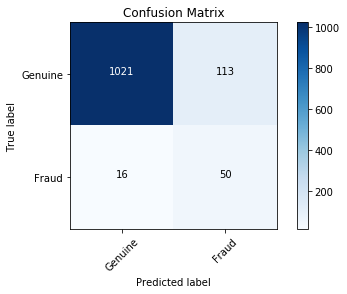

In [ ]:
clf = GradientBoostingClassifier(n_estimators = 23, max_depth = 5,\
                    learning_rate = 0.01, max_features = 70, random_state= 40)
clf.fit(X_train, y_train)
ypred_test = clf.predict(X_test)
auc_score = eval_classification(y_test, ypred_test,\
                    class_labels=class_labels, metrics = ['auc','confusion_matrix'] )

## Write results to file

In [ ]:
final_pred = clf.predict_proba(final_test)
csv_pred_out = pd.read_csv('test.csv')
csv_pred_out['y']  = [ pred_1 for pred_0,pred_1 in final_pred ]
csv_pred_out.to_csv('results.csv')
csv_pred_out.sample(5)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,y
18,1.103591,-28.830676,5.059542,13.812129,0.650883,0.0%,Tuesday,3.773754,0.883563,-2.313705,...,-0.150254,14.164410,8.250238,-3.625832,-0.902153,10.807495,-3.065013,9.199741,3.008791,0.564131
815,2.263607,5.409591,4.793360,1.993889,0.395050,NaN,Thurday,3.143361,-2.075564,9.696390,...,-8.234840,-6.380293,-0.431761,5.267384,-2.206696,4.533662,8.862672,2.257208,-5.727691,0.558868
767,-13.332405,28.027106,0.225378,-5.159562,1.855717,0.01%,Tuesday,12.671503,0.169711,1.471683,...,6.342704,-1.822098,1.073871,-2.069681,2.554085,6.178979,6.058298,-4.002280,1.276721,0.548083
1270,5.998526,-2.460125,-2.930018,8.331386,0.390447,-0.01%,Tuesday,2.451498,-0.189497,-0.064873,...,-3.008891,26.890027,-13.394609,2.728404,-1.367727,3.641047,-2.079027,2.782340,-2.465241,0.562027
336,1.137314,-14.014673,-2.077587,-2.126139,-1.165590,0.0%,Wednesday,-1.764905,4.299453,-3.416375,...,-3.316452,-16.970543,15.048183,2.850052,0.259376,4.115300,-2.841802,-5.770592,2.809726,0.536521


# To Dos :

## TD 1 : Concept Drift : Sliding Window / Propagate  & Forget Strategy

In this assignment, the momentary priority was on the auc maximisation, while the long time priority  or the ultimate mission was to develop a system capable to withstand concept drift.

To gain the ultimate mission, our currently developed static models would be highly inefficient and hence models able to withstand the concepts drift are required. They can be

## 1.0 Sliding window :
1. Build daily model. (model build timeframe to be optimally determined)
2. Take the latest n models and ensemble them.
3. Put more weight on latest models prediction.
4. Perform Prediction

## 2.0  Propagate and Forget:
1. Similar to sliding window, the  only difference is that unlike in sliding wndow where we disregard the old fraud data, in this approach we carry all those fraud data over  any period of time. As for the non-fraud data only the latest n periods non fraud data are considered.


## TD2 : Classifier for Alert Fixes :
Separate classifier needs to be built to deal with manually annotated data because data distribution is different for the manually annotated or corrected datasets than other normal.


# Question 3

**Question 3:**
The bank is clearly interested in minimizing the losses from fraud, but they are
also aware that false positives take time to sort out and impact the customer experience.

1. Is the area under the ROC curve the most suitable metric? If so why, and if not then how should the model be evaluated ?

**Answer:** Auc curves tell us the relationship between TPR and FPR and focus onn how well a model discriminates between two classes. However they are not always necessarily a good metric for ml algorithm tuning or as a measure.

For example a model that predict probability of 0.501 for positive and 0.499 for negative will have a perfect auc score of 1. However the probability are not really helpful and hence other probability difference minimising metrics may also be more useful i.e Brier's score. 

Such probabilistically more accurate models maybe more relevant to the fraud detection rather than simple and plain discriminator models with low discrimination threshold.

Let's see the same demonstration with our empirical example below


Same AUC score but "MODEL 2" is significantly far better than "MODEL 1"


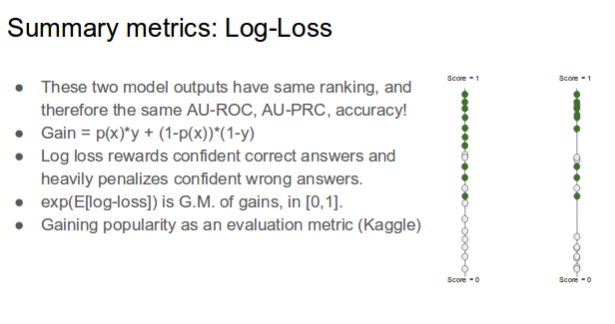

In [ ]:
from IPython.display import Image
print('Same AUC score but "MODEL 2" is significantly far better than "MODEL 1"')
Image("images/auc score misleading.png")
#  REF: http://cs229.stanford.edu/section/evaluation_metrics.pdf

In [ ]:
print("Observing Empirically")
print('')
eval_classification(y_test, clf.predict(X_test) )

Observing Empirically

AUC (higher is better) 0.8289642456309123


0.8289642456309123

In [ ]:
y_test_pred_proba = clf.predict_proba(X_test)
print('Comparing 1  prediction at index [0,29,85,103,111]')
print(y_test_pred_proba[[8,33,65,85]])
print('')
print('Compared with actual lables')
print(y_test[y_test[0] == 1][0:5])

print('')
print('Conclusion : Empirically also we can see that because \
we  focussed on maximising auc scores, as a result we have \
good auc scores but  bad probability differentiator')

Comparing 1  prediction at index [0,29,85,103,111]
[[0.42709182 0.57290818]
 [0.43378906 0.56621094]
 [0.42856774 0.57143226]
 [0.45646054 0.54353946]]

Compared with actual lables
     0
8    1
33   1
65   1
85   1
107  1

Conclusion : Empirically also we can see that because we  focussed on maximising auc scores, as a result we have good auc scores but  bad probability differentiator


**b) What is the difference between a metric and a loss function?**
**Answer:**
1. Metric : Metric is a function used to judge performance of model and is not used in the model training to improve the model.
2. Loss function : Loss function and metric are similar but the oly difference is that the loss function is used in the model training to  improve model over iterations

For example, we used binary_cross entropy as our loss function  while using accuracy and auc as metrics for our keras  based NN classifier

model.compile(optimizer=optimizer, loss='binary_crossentropy',                 metrics=['accuracy',auc_roc])  


** c) How might your approach in Question 1 change if you had used your desired metric? **
**Answer: **  Because metric is not used in the model tuning or learning process as described in  earlier question b), it might not have any impact at all.

However,  if we use the  desired loss function such as Brier score, then it would have significant impacyt. Brier Score is given by

Brier Score = Sum_i(observed_prob - expected_output)^2

Hence, unlike in the earlier instance where our probabilities were clustering to 0.5  but yielding a good auc score, we would have obtained good probabilistic classifier that would have maximised probailistic separation i.e fraud's probability will be clustered towards 1  and vice versa, rather than being

-  Predicted Probability   -------- vs --------   Actual Fraud Label
- [0.49933839 0.50066161]     ----- vs --------             1
- [0.49972204 0.50027796]     ----- vs --------             1
- [0.49958261 0.50041739]     ----- vs --------             1
- [0.49969233 0.50030767]     ----- vs --------             1
- [0.49959703 0.50040297]     ----- vs --------             1


With Brier Score expecting  "MODEL B" vs auc tuned "MODEL A"


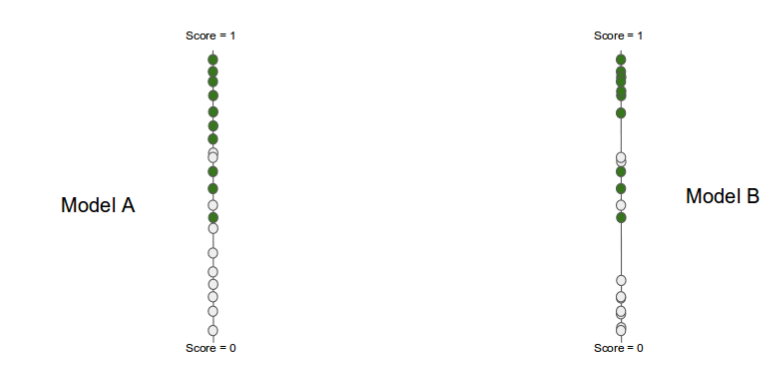

In [ ]:
print('With Brier Score expecting  "MODEL B" vs auc tuned "MODEL A"')
Image("images/brier_score vs auc.png")

**d) How would you decide at which threshold (probability) to block the transaction?**
**Answer :**  We can perform threshold scanning  taking into accounting the bank's pain threshold for the following

1. Customer Inconvenience i.e minimise FP or Genuine trans that is tagged  Fraud.
2. Fraud loss i.e minimise FN or Fraud trans that is Unidentified 

To decide which threshold to block the transactions at, several plots can be useful.

The plots have error rate  on y-axis and threshold on the x-axis with  following possible metrics combination, as plotted in the graph
1. Precision vs Recall 
    - Precision : maximise: fraction of true frauds vs all predicted frauds 
    - Recall : maximise : fraction of predicted frauds vs all true frauds

2. FNR vs FPR i.e error for fraud trans vs error for non-fraud trans.
   - FNR =  FN / (FN + TP) -  capture more Fraud Trans (FN)   
   - FPR =  FP / FP + TN   -  with low false tagging 
   

In case, when  one of the pain threshold( precision or recall) is hard-fixed, we could optimise for the other attribute along the threhold space, thus reaching to  optimal threshold probability.

Now once the plots are  done, based on the business stakeholders requirement across threshold, we will have to conservatively set the threshold.

Finding Threshold using plots. Sample FPR vs FNR plot


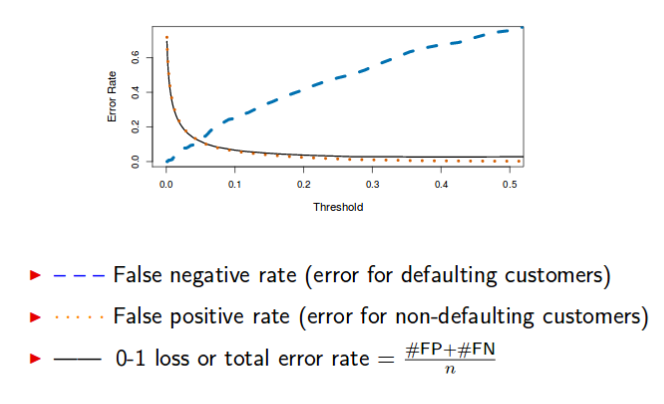

In [ ]:
print('Sample example of using plots to finding Threshold. FPR vs FNR plot')
Image('images/FPR vs FNR.png')

In [ ]:
#final_pred = clf.predict_proba(final_test)

3. Question 2: In presenting your results back to an audience including both the executive team
and fraud experts, your partner at .... has requested you generate some relevant visualizations
of your work. Assemble a single slide around the PoC and your model that tells a compelling story
about the data and your solution.

4. Question 3: The bank is clearly interested in minimizing the losses from fraud, but they are
also aware that false positives take time to sort out and impact the customer experience.

a) Is the area under the ROC curve the most suitable metric? If so why, and if not then how should
the model be evaluated?

b) What is the di
erence between a metric and a loss function?

c) How might your approach in Question 1 change if you had used your desired metric?

d) How would you decide at which threshold (probability) to block the transaction?